In [23]:
x0 = np.random.rand(40)
x0

array([3.93124131e-02, 5.82773071e-01, 5.80428105e-01, 1.01200516e-02,
       7.08127013e-01, 1.97530973e-01, 8.89890258e-01, 1.72016876e-01,
       8.24036641e-01, 3.63383426e-01, 8.29729163e-01, 3.57334264e-01,
       9.39570032e-01, 2.98400024e-02, 8.66227198e-02, 5.02984048e-01,
       6.78855529e-01, 3.56178599e-01, 4.37469780e-01, 5.54832528e-01,
       4.10693035e-02, 8.52434907e-01, 7.24249296e-01, 3.29731595e-01,
       9.28068754e-01, 7.79098703e-01, 1.42677877e-01, 7.08473173e-01,
       5.60687614e-01, 4.64661883e-01, 8.60261368e-01, 3.29864171e-01,
       1.06988714e-01, 6.80931909e-04, 5.12948094e-03, 2.66617990e-01,
       6.53855414e-03, 9.95510605e-01, 2.74938437e-02, 6.71627112e-02])

In [24]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

#x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2,10,40,1,6,5,12,1,4,5,6,3,2,7,-1,2,3,4])


res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
print(res.x)

[ 0.38485341  0.13992125  0.0403471   0.03316081  0.01466026  0.03182755
  0.02517174  0.11580586  0.01821502  0.06746616 -0.012438    0.00210446
 -0.01137433  0.20336589  0.09866709  0.05169481  0.00198313 -0.0141297
 -0.01286858  0.03236938 -0.03835868  0.01320723 -0.00534061  0.05605636
  0.03001329 -0.00043306  0.18264291  0.03905858 -0.02042312  0.06836147
  0.0088702   0.10837739  0.20310754  0.00155803  0.02627566 -0.00291049
  0.02609271  0.01132475  0.09446326 -0.09381346]


In [9]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [25]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 134
         Gradient evaluations: 134


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.00000001, 1.00000003, 1.00000004, 1.00000008])

In [11]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [38]:
def derivative_free(x0):
    tstart = time.clock()
    res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
    tend = time.clock()
    return tend - tstart
    

In [40]:
def first_order(x0):
    tstart = time.clock()
    res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
    tend = time.clock()
    return tend - tstart

In [41]:
def second_order(x0):
    tstart = time.clock()
    res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
    tend = time.clock()
    return tend - tstart

In [36]:
import time
import matplotlib.pyplot as plt




Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 48
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 38
         Gradient evaluations: 68
         Hessian evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 68
         Function evaluations: 80
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 79
         Hessian evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 143
         Function evaluations: 171
         Gradient evaluations: 171
Optimization terminated successfully.
         Current function value: 

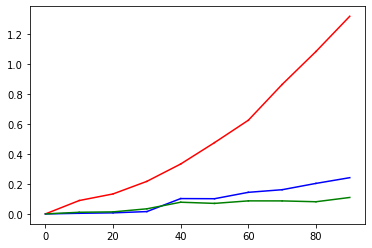

In [42]:
N = range(10,100,10)
y0 = [0]
y1 = [0]
y2 = [0]
for i,n in enumerate(N):
    x0 = np.random.rand(n)
    y0 = y0 + [derivative_free(x0)]
    y1 = y1 + [first_order(x0)]
    y2 = y2 + [second_order(x0)]
    plt.plot([n-10,n],[y0[i],y0[i+1]], color = 'r')
    plt.plot([n-10,n],[y1[i],y1[i+1]], color = 'b')
    plt.plot([n-10,n],[y2[i],y2[i+1]], color = 'g')
    
    
    


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 220
         Function evaluations: 246
         Gradient evaluations: 246
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 65
         Function evaluations: 84
         Gradient evaluations: 148
         Hessian evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 377
         Function evaluations: 446
         Gradient evaluations: 446
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 129
         Gradient evaluations: 228
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 509
         Function evaluations: 589
         Gradient evaluations: 589
Optimization terminated successfully.
         Current funct

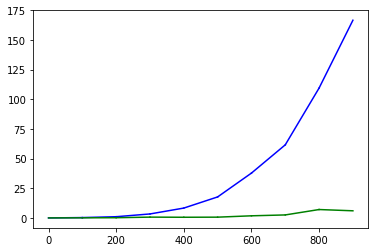

In [44]:
N = range(100,1000,100)
#y0 = [0]
y1 = [0]
y2 = [0]
for i,n in enumerate(N):
    x0 = np.random.rand(n)
    #y0 = y0 + [derivative_free(x0)]
    y1 = y1 + [first_order(x0)]
    y2 = y2 + [second_order(x0)]
    #plt.plot([n-10,n],[y0[i],y0[i+1]], color = 'r')
    plt.plot([n-100,n],[y1[i],y1[i+1]], color = 'b')
    plt.plot([n-100,n],[y2[i],y2[i+1]], color = 'g')

In [46]:
plt.show()

In [47]:
y3

[3, 4]

In [48]:
y2

[0,
 0.0786510000000078,
 0.16865700000001027,
 0.6689949999999953,
 0.5552539999999908,
 0.6383150000000057,
 1.7772799999999904,
 2.5184399999999982,
 7.0702890000000025,
 6.001640000000009]

In [49]:
y1

[0,
 0.29289499999998725,
 1.0138000000000034,
 3.3471370000000036,
 8.308315000000007,
 17.70738700000001,
 37.812674000000015,
 61.64468600000001,
 109.54364999999999,
 166.740413]

In [50]:
N

range(100, 1000, 100)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1404
         Function evaluations: 1562
         Gradient evaluations: 1562
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 336
         Function evaluations: 449
         Gradient evaluations: 784
         Hessian evaluations: 336
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2395
         Function evaluations: 2623
         Gradient evaluations: 2623
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 460
         Function evaluations: 587
         Gradient evaluations: 1046
         Hessian evaluations: 460


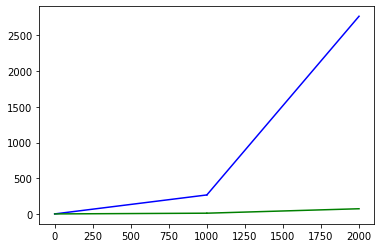

In [54]:
N = [1000,2000]
#y0 = [0]
yLarge1 = [0]
yLarge2 = [0]
for i,n in enumerate(N):
    x0 = np.random.rand(n)
    #y0 = y0 + [derivative_free(x0)]
    yLarge1 = yLarge1 + [first_order(x0)]
    yLarge2 = yLarge2 + [second_order(x0)]
    #plt.plot([n-10,n],[y0[i],y0[i+1]], color = 'r')
    plt.plot([n-1000,n],[yLarge1[i],yLarge1[i+1]], color = 'b')
    plt.plot([n-1000,n],[yLarge2[i],yLarge2[i+1]], color = 'g')

In [55]:
yLarge1

[0, 265.8282889999998, 2768.659211]

In [56]:
yLarge2

[0, 10.121258000000125, 72.32411800000045]